In [561]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [562]:
data = pd.read_csv('./tvshows.csv')
data

,Title,Years,Certification,Runtime,Rating,Number of Votes,Emmys,Creators,Actors,Genres,Coutries of origins,Languages,Production companies,Link
0,Queen Cleopatra,2023,TV-14,45m,1.2,86K,0,NaN,"Jada Pinkett Smith, Adele James, Craig Russell...","Documentary, Drama, History",United Kingdom,English,Nutopia,https://www.imdb.com/title/tt27528139/?ref_=sr...
1,Velma,2023–2024,TV-MA,25m,1.6,80K,0,Charlie Grandy,"Mindy Kaling, Glenn Howerton, Sam Richardson, ...","Animation, Adventure, Comedy, Crime, Horror, M...","United States, South Korea",English,"Charlie Grandy Productions, Kaling Internation...",https://www.imdb.com/title/tt14153790/?ref_=sr...
2,Keeping Up with the Kardashians,2007–2021,TV-14,44m,2.9,32K,0,"Ryan Seacrest, Eliot Goldberg","Khloé Kardashian, Kim Kardashian, Kourtney Kar...","Family, Reality-TV",United States,"English, Spanish","Bunim-Murray Productions (BMP), Ryan Seacrest ...",https://www.imdb.com/title/tt1086761/?ref_=sr_...
3,Batwoman,2019–2022,TV-14,45m,3.6,47K,0,Caroline Dries,"Camrus Johnson, Rachel Skarsten, Meagan Tandy,...","Action, Adventure, Crime, Drama, Sci-Fi",United States,English,"Berlanti Productions, DC Entertainment, Warner...",https://www.imdb.com/title/tt8712204/?ref_=sr_...
4,The Acolyte,2024,TV-14,35m,4.1,125K,0,Leslye Headland,"Lee Jung-jae, Amandla Stenberg, Manny Jacinto,...","Action, Adventure, Drama, Fantasy, Mystery, Sc...",United States,English,"Lucasfilm, Disney+, The Walt Disney Company",https://www.imdb.com/title/tt12262202/?ref_=sr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,The Wire,2002–2008,TV-MA,1h,9.3,390K,0,David Simon,"Dominic West, Lance Reddick, Sonja Sohn, Wende...","Crime, Drama, Thriller",United States,"English, Greek, Mandarin, Spanish","Blown Deadline Productions, Home Box Office (HBO)",https://www.imdb.com/title/tt0306414/?ref_=sr_i_5
1134,Planet Earth,2006,TV-PG,50m,9.4,223K,4,NaN,"Sigourney Weaver, David Attenborough, Nikolay ...","Documentary, Family","United Kingdom, Canada, United States, Japan",English,"British Broadcasting Corporation (BBC), Canadi...",https://www.imdb.com/title/tt0795176/?ref_=sr_i_4
1135,Band of Brothers,2001,TV-MA,1h,9.4,544K,6,NaN,"Scott Grimes, Damian Lewis, Ron Livingston, Sh...","Drama, History, War","United Kingdom, United States","English, Dutch, French, German, Lithuanian","DreamWorks, DreamWorks Television, HBO Films",https://www.imdb.com/title/tt0185906/?ref_=sr_i_3
1136,Planet Earth II,2016,TV-G,50m,9.5,162K,2,NaN,"David Attenborough, Michael J. Sanderson, Gord...",Documentary,"United Kingdom, Germany, France, China, United...","English, French","BBC Natural History Unit (NHU), BBC America, Z...",https://www.imdb.com/title/tt5491994/?ref_=sr_i_2


# Mean of each column

- Title: title of the show
- Years: year of broadcast of the show
- Certification: certification that the show has
- Runtime: Time limited of the show
- Rating: the score on 10 point scale
- Number of Votes: express vote of the show
- Emmys: the show has how much emmy prize
- Creators: The people or group people make the show
- Actor: The people join the show
- Genres: type of the show
- Countries of origins: the country originate the show
- Language: the language of the show
- Production Companies: the company produce the show
- Link: link of the show

# Check datatype of columns

In [563]:
data.dtypes

Title                    object
Years                    object
Certification            object
Runtime                  object
Rating                  float64
Number of Votes          object
Emmys                     int64
Creators                 object
Actors                   object
Genres                   object
Coutries of origins      object
Languages                object
Production companies     object
Link                     object
dtype: object

## See that we need to adjust the data type of some columns:  
### - Runtime  
### - Number of Votes  
### - Years

# Shape of data

In [564]:
# Size of data set
data.shape

(1138, 14)

So, the dataset with 1138 rows and 14 columns meets the requirements.

# Check duplicate

In [565]:
data[data.duplicated(keep=False)]

,Title,Years,Certification,Runtime,Rating,Number of Votes,Emmys,Creators,Actors,Genres,Coutries of origins,Languages,Production companies,Link


Hoàn toàn không có 2 hàng nào hoàn toàn giống nhau

# Blank shell of each columns

In [566]:
data.isna().sum()

Title                     0
Years                     0
Certification            14
Runtime                  57
Rating                    0
Number of Votes           0
Emmys                     0
Creators                198
Actors                    1
Genres                    0
Coutries of origins       0
Languages                 0
Production companies     17
Link                      0
dtype: int64

The **Runtime** and **Creators** columns have quite a few missing values (NAN). However, the **Creators** column is not a critical factor that we need to focus on, so it can be ignored. Meanwhile, the **Runtime** column plays a more important role, and we will spend time handling this column in more detail in the subsequent steps.

# Change data in column Runtime about minute unit

Based on the data, we can easily observe that the **Runtime** column is divided into time units as follows: **h** represents hours, **m** represents minutes, and some values contain both **h** and **m**.

For the values in the **Runtime** column, we will process them as follows:

- **Case with both "h" and "m"**: Use the `split` function to separate the value into two parts based on the "h" character. The part before "h" will be converted to a number and multiplied by 60 (to convert to minutes), then added to the second part (the number of minutes).  
- **Case with only "h"**: Extract the part before "h," convert it to a number, and multiply it by 60.  
- **Case with only "m"**: Simply take the number of minutes from the value.  

This approach ensures that all values in the **Runtime** column are uniformly converted to minutes.

In [567]:
new_col = []  
for val in data['Runtime']:
    if isinstance(val, str):
        if 'h' in val and 'm' in val: # Case have hour and minute
            hour, min = val.split('h')
            min = min.split('m')[0]
            new_col.append(int(hour) * 60 + int(min))
        elif 'h' in val:  # Case only hour
            hour = val.split('h')[0]
            new_col.append(int(hour) * 60)
        elif 'm' in val:  # Case only minute
            min = val.split('m')[0]
            new_col.append(int(min))
        elif pd.isna(val):
            new_col.append(0)
    else:
        new_col.append(val)  #if val is not str then append the list

data['Runtime'] = new_col
# Convert the 'Runtime' column to integer type, filling any remaining NaN with 0 first
data['Runtime'] = data['Runtime'].fillna(0).astype('float')
print(data['Runtime'])

0       45.0
1       25.0
2       44.0
3       45.0
4       35.0
        ... 
1133    60.0
1134    50.0
1135    60.0
1136    50.0
1137    45.0
Name: Runtime, Length: 1138, dtype: float64


# Change data in column Number of Votes

In the dataset, we notice that some values in the column are formatted as numbers with the **K** (thousand) or **M** (million) suffixes. To process these, we need to convert the values into standard numerical format as follows:

- **If the value contains the "K" suffix**: Extract the number before the **K**, convert it to a numeric type, and then multiply by \( 10^3 \).  
- **If the value contains the "M" suffix**: Extract the number before the **M**, convert it to a numeric type, and then multiply by \( 10^6 \).  
- **If the value has no suffix**: Retain the value as it is.  

By doing this, we can standardize all the values in the column to a consistent numeric format.

In [568]:
new_col = []
for i in data['Number of Votes']:
    if 'K' in i:
        val = i.split('K')[0]
        new_col.append(int(float(val)*(10**3)))
    elif 'M' in i: 
        val = i.split('M')[0]
        new_col.append(int(float(val)*(10**6)))
data['Number of Votes'] = new_col
data['Number of Votes']

0         86000
1         80000
2         32000
3         47000
4        125000
         ...   
1133     390000
1134     223000
1135     544000
1136     162000
1137    2200000
Name: Number of Votes, Length: 1138, dtype: int64

# Handle Year column

To process the **Year** column with the format **2023–2024** (where the "–" is a special character different from the hyphen "-"), we will follow these steps:

1. **Replace the "–" character**: First, we need to replace the "–" with a regular hyphen "-" (which is easier to handle in Python) to ensure that all values can be easily split.

2. **Split the value into two parts**: After replacing the "–" character, if the **Year** column contains two years (e.g., "2023-2024"), we will split the value into two parts:
   - The first year (the start year of the release).
   - The second year (the end year of the release).
   These two years will be converted into a tuple in the form of (start_year, end_year).

3. **Handle cases with only one year**: If there is only one year (e.g., "2023"), we will assign that year to both the start and end years, and convert it into a tuple in the form of (year, year).

This approach ensures that the **Year** column is consistently converted into a tuple format, regardless of whether it represents a single year or a range of years.

In [569]:
def process_years(years):
    # Replace the special character '–' with '-'
    years = years.replace('–', '-')
    
    # Split the string by '-' and process the parts
    parts = years.split('-')
    year_start = int(parts[0]) if parts[0].isdigit() else None
    year_end = int(parts[1]) if len(parts) > 1 and parts[1].isdigit() else None
    
    return (year_start, year_end)

# Apply the function to the Years column
data['Years'] = data['Years'].apply(process_years)

# Display the processed data
print(data['Years'])

0       (2023, None)
1       (2023, 2024)
2       (2007, 2021)
3       (2019, 2022)
4       (2024, None)
            ...     
1133    (2002, 2008)
1134    (2006, None)
1135    (2001, None)
1136    (2016, None)
1137    (2008, 2013)
Name: Years, Length: 1138, dtype: object


Chúng ta sẽ visualization để thấy rõ được sự phân bố giá trị và các gí trị outlier bằng boxplot

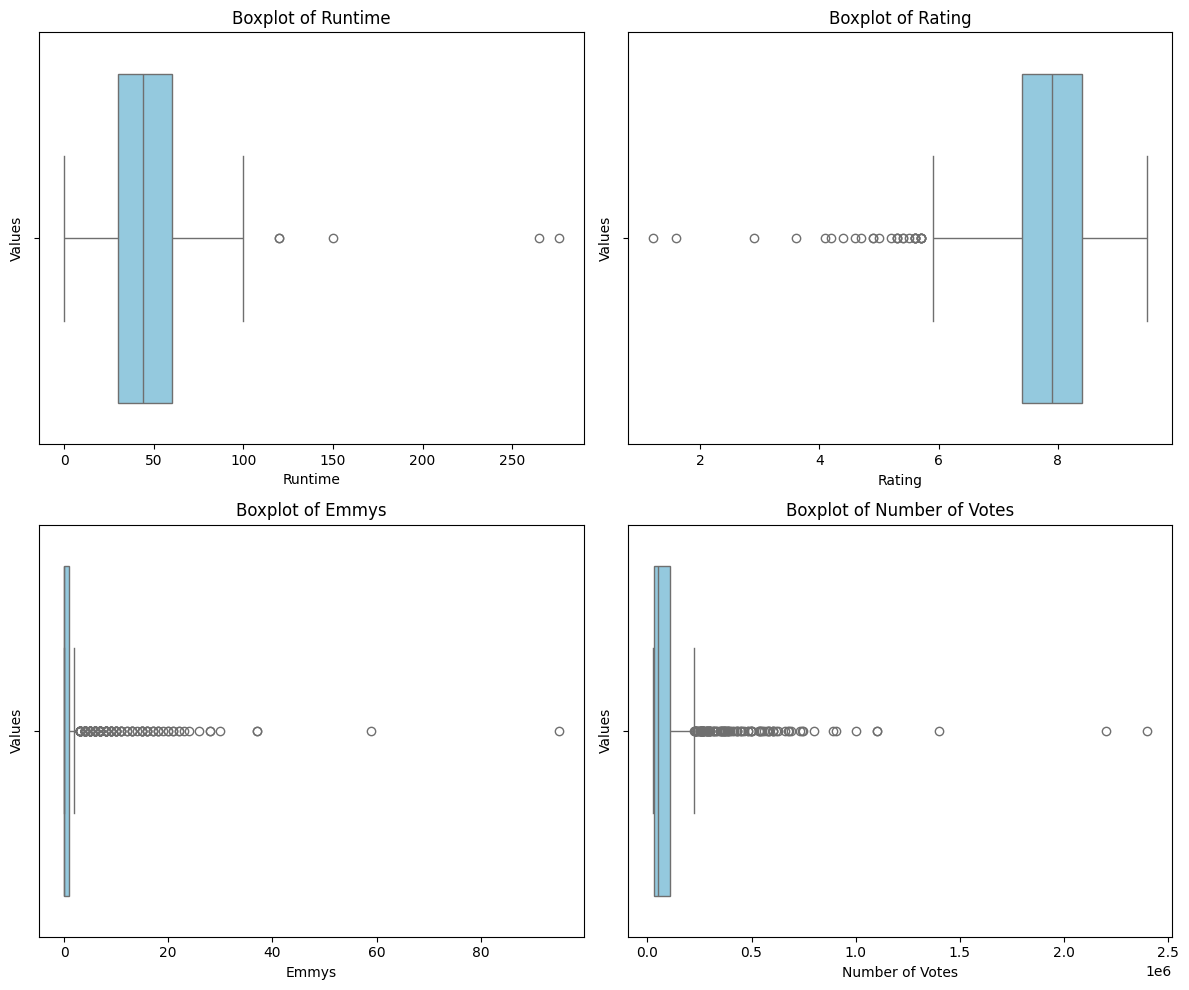

In [570]:

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

columns_to_plot = ['Runtime', 'Rating', 'Emmys', 'Number of Votes']

# Vẽ boxplot cho từng cột vào từng subplot
for i, column in enumerate(columns_to_plot):
    row = i // 2  
    col = i % 2   
    sns.boxplot(data=data, x=column, ax=axes[row, col], color='skyblue')
    axes[row, col].set_title(f"Boxplot of {column}")
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel("Values")


plt.tight_layout()
plt.show()

Chúng ta sẽ fill nan bằng giá trị 0 trước khi xử lý outlier

In [571]:
data[['Rating', 'Emmys', 'Number of Votes']] = data[['Rating', 'Emmys', 'Number of Votes']].fillna(0)

In [572]:

# Hàm để xử lý outliers bằng IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Loại bỏ các giá trị ngoài phạm vi IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df_filtered




Xử lý các outlier ở các cột Runtime, Rating, Emmys, Number of Votes

In [573]:
# Xử lý outliers cho các cột
data_cleaned = data.copy()
for column in ['Runtime', 'Rating', 'Emmys', 'Number of Votes']:
    data_cleaned = remove_outliers_iqr(data_cleaned, column)

data = data_cleaned

print(data.shape)

(855, 14)


# Scale value of numeric columns

Column: Runtime
Min: 0.0, Max: 100.0, Median: 44.0, Mean: 41.50409356725146
----------------------------------------


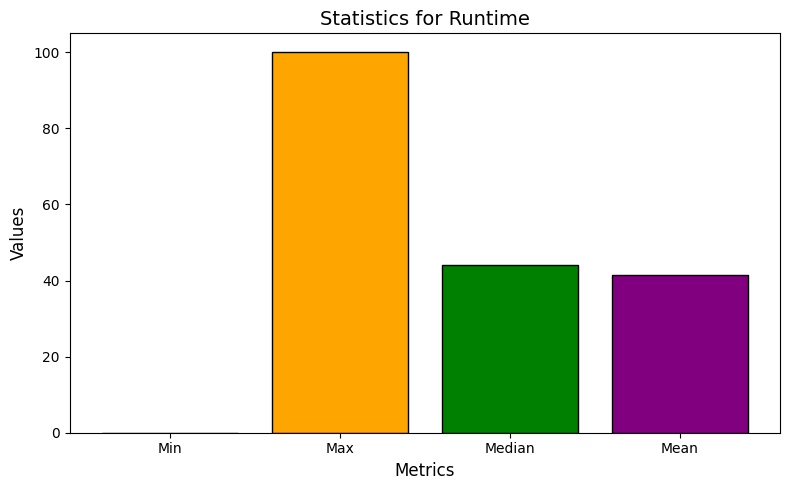

Column: Rating
Min: 5.9, Max: 9.5, Median: 7.8, Mean: 7.796374269005848
----------------------------------------


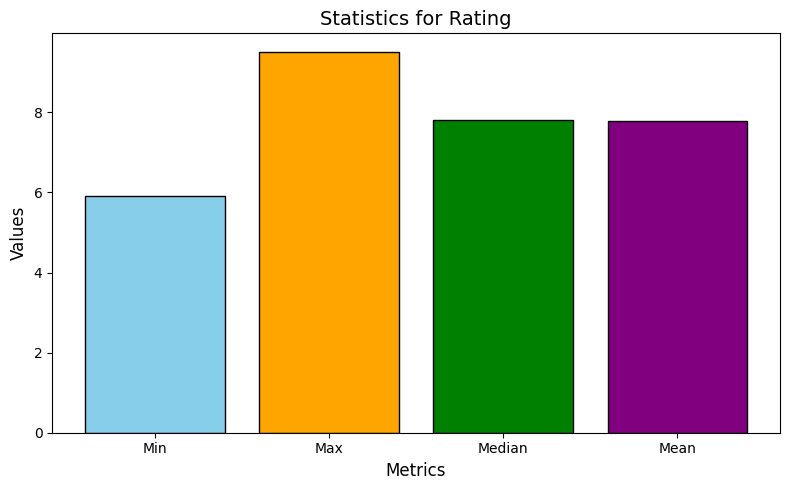

Column: Number of Votes
Min: 25000, Max: 179000, Median: 46000.0, Mean: 59625.73099415204
----------------------------------------


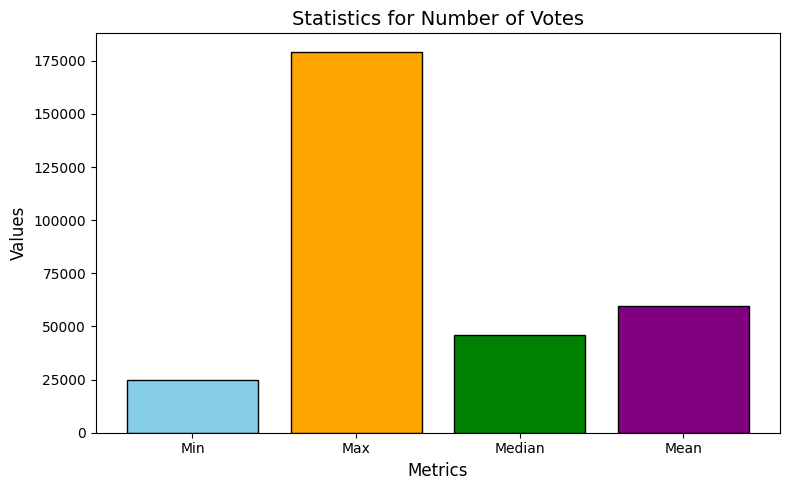

Column: Emmys
Min: 0, Max: 2, Median: 0.0, Mean: 0.19064327485380117
----------------------------------------


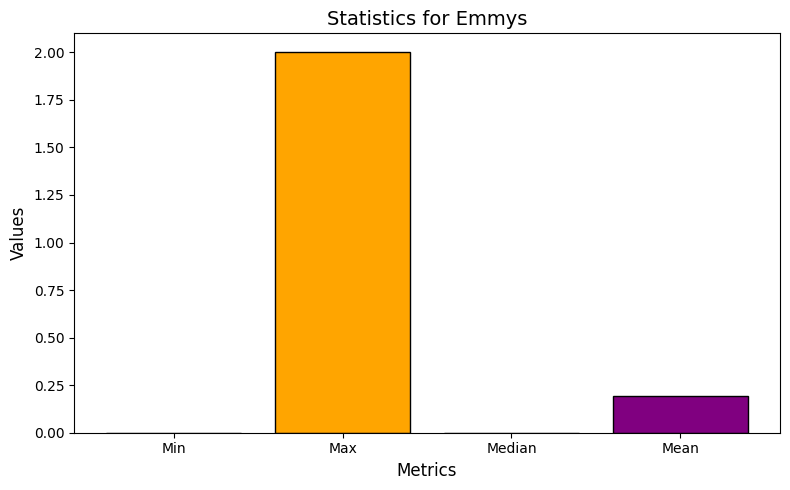

In [574]:

d = data[['Runtime', 'Rating', 'Number of Votes', 'Emmys']]

for column in d.columns:
    # Tính Min, Max, Median, và Mean
    min_val = d[column].min()
    max_val = d[column].max()
    median_val = d[column].median()
    mean_val = d[column].mean()

    
    print(f"Column: {column}")
    print(f"Min: {min_val}, Max: {max_val}, Median: {median_val}, Mean: {mean_val}")
    print("-" * 40)

    
    stats = {
        'Min': min_val,
        'Max': max_val,
        'Median': median_val,
        'Mean': mean_val
    }

    # Visualization
    plt.figure(figsize=(8, 5))
    plt.bar(stats.keys(), stats.values(), color=['skyblue', 'orange', 'green', 'purple'], edgecolor='black')
    plt.title(f'Statistics for {column}', fontsize=14)
    plt.xlabel('Metrics', fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.tight_layout()

   
    plt.show()



# Meaningful Question

Câu 1: What is best show ?

## Benefit of finding the answer:
The benefit of finding the answer to this question is that it will help you find the best show. The best show is found by ratings, votes, emmys with same weight.


In [575]:
matrix_corr = data[['Runtime', 'Rating', 'Number of Votes', 'Emmys']].corr()
matrix_corr

,Runtime,Rating,Number of Votes,Emmys
Runtime,1.000000,-0.031706,0.076381,0.021564
Rating,-0.031706,1.000000,0.190486,0.078712
Number of Votes,0.076381,0.190486,1.000000,0.134836
Emmys,0.021564,0.078712,0.134836,1.000000


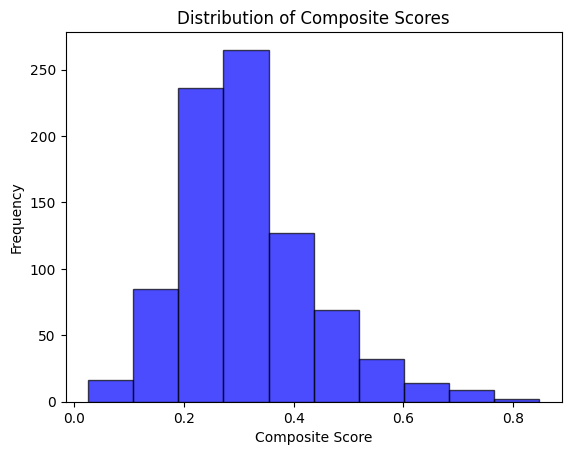

Top 10 shows:
                         Title  Composite Score
1136           Planet Earth II         0.847403
1062          When They See Us         0.828824
815   Buffy the Vampire Slayer         0.750693
933             Silicon Valley         0.740945
1068      Curb Your Enthusiasm         0.732558
734                      Chuck         0.718521
1084             Gravity Falls         0.712262
990                  Justified         0.707468
680                 Black Bird         0.693882
1113            The Last Dance         0.689755


In [576]:
df = pd.DataFrame(data)

# Min-Max Normalization
# For each column, apply the formula: (x - min) / (max - min)
df['Runtime_norm'] = (df['Runtime'] - df['Runtime'].min()) / (df['Runtime'].max() - df['Runtime'].min())
df['Rating_norm'] = (df['Rating'] - df['Rating'].min()) / (df['Rating'].max() - df['Rating'].min())
df['Votes_norm'] = (df['Number of Votes'] - df['Number of Votes'].min()) / (df['Number of Votes'].max() - df['Number of Votes'].min())
df['Emmys_norm'] = (df['Emmys'] - df['Emmys'].min()) / (df['Emmys'].max() - df['Emmys'].min())


# Define weights for each factor
runtime_weight = 1/4
rating_weight = 1/4
votes_weight = 1/4
emmys_weight = 1/4

# Calculate the composite score using the weighted sum of normalized factors
df['Composite Score'] = (
    df['Runtime_norm'] *runtime_weight +
    df['Rating_norm'] * rating_weight +
    df['Votes_norm'] * votes_weight +
    df['Emmys_norm'] * emmys_weight
)

# print(df[['Title', 'Composite Score']])
# Plot histogram of composite scores
plt.hist(df['Composite Score'], bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Composite Scores')
plt.xlabel('Composite Score')
plt.ylabel('Frequency')
plt.show()


# Select the shows with the highest composite scores
top_shows = df.nlargest(10, 'Composite Score')[['Title', 'Composite Score']]
print("Top 10 shows:")
print(top_shows)

Câu 2: What are the trends in runtime and ratings over the years?
• Benefit: Identifies if shorter or longer shows are trending, helping producers adapt their 
strategies.
• How to Find the Answer: Plot runtime vs. rating over years using line or scatter plots.

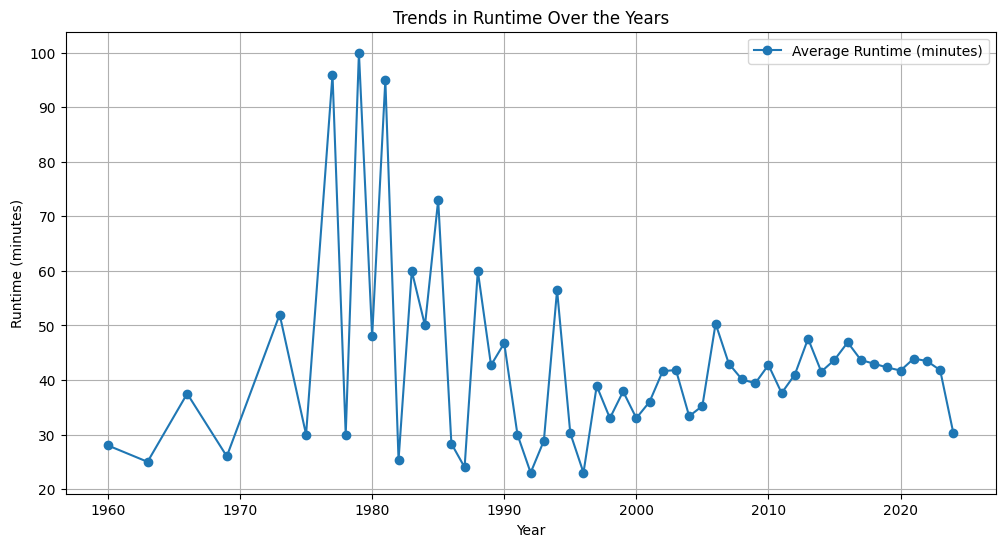

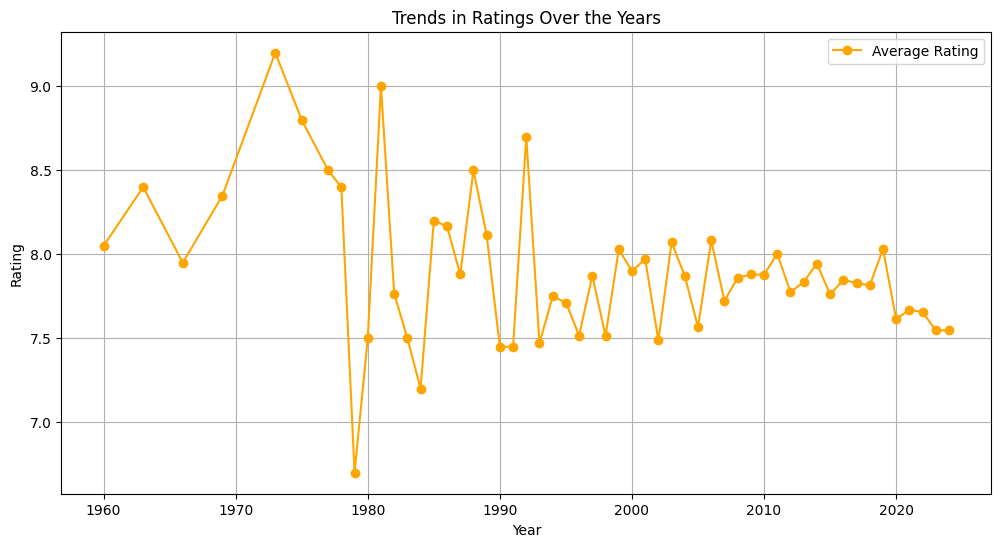

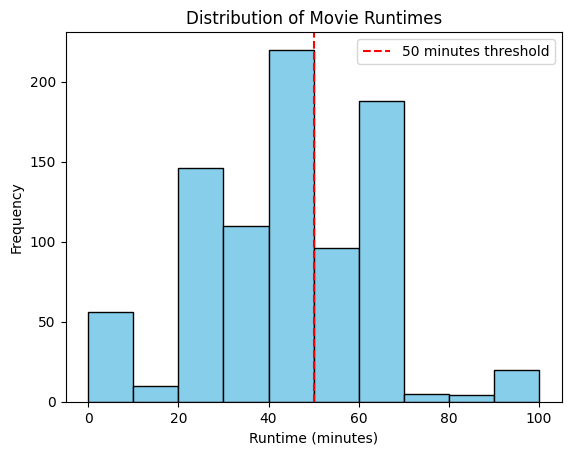

In [577]:
data['Years'] = data['Years'].apply(lambda x: (x[0], x[1]) if isinstance(x, tuple) and len(x) == 2 else (x, None))

# Expand the Years column into start and end years
data[['Year_Start', 'Year_End']] = pd.DataFrame(data['Years'].tolist(), index=data.index)
# Use only the start year for trend analysis
data['Year'] = data['Year_Start']
# Group data by Year and calculate average runtime and rating
grouped_data = data.groupby('Year')[['Runtime', 'Rating']].mean()


# Plot runtime trends over years
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data['Runtime'], marker='o', label='Average Runtime (minutes)')
plt.xlabel('Year')
plt.ylabel('Runtime (minutes)')
plt.title('Trends in Runtime Over the Years')
plt.legend()
plt.grid(True)
plt.show()

# Plot ratings trends over years
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data['Rating'], marker='o', color='orange', label='Average Rating')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Trends in Ratings Over the Years')
plt.legend()
plt.grid(True)
plt.show()

#Biểu đồ histogram để xem phân bố thời lượng của tất cả các bộ phim.
plt.hist(df['Runtime'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.axvline(50, color='red', linestyle='--', label='50 minutes threshold')
plt.legend()
plt.show()



Có vẻ người xem thích những bộ phim ngắn, có thời lượng dưới 50 phút.

Vậy chúng ta tìm xem vị trí của những bộ phim có thời lượng ngắn trong các bộ phim hay nhất mà ta đã xếp hạng.

In [578]:
# Bước 1: Lấy các bộ phim có thời lượng dưới 50 phút
short_runtime_movies = df[df['Runtime'] < 50]

# Bước 2: Lấy 20 bộ phim có Composite Score cao nhất từ short_runtime_movies
top_20_short_runtime = short_runtime_movies.nlargest(20, 'Composite Score')

# Bước 3: Tìm vị trí của các bộ phim đó trong danh sách toàn bộ dựa trên Composite Score
positions_in_all = df['Composite Score'].rank(ascending=False)
top_20_short_runtime['Rank in All'] = top_20_short_runtime['Composite Score'].rank(ascending=False).astype(int)

# Hiển thị kết quả
print("Các bộ phim dưới 50 phút:")
print(short_runtime_movies[['Title', 'Composite Score']])

print("\nTop 20 bộ phim có thời lượng dưới 50 phút (và vị trí trong danh sách toàn bộ):")
print(top_20_short_runtime[['Title', 'Composite Score', 'Rank in All']])

Các bộ phim dưới 50 phút:
                      Title  Composite Score
29          Secret Invasion         0.203409
31                     Joey         0.094412
32                     Echo         0.137918
33          Black Lightning         0.126259
34           The Langoliers         0.025253
...                     ...              ...
1108         Sandeep Bhaiya         0.305014
1111           TVF Pitchers         0.400144
1118  The Filthy Frank Show         0.243777
1129      Sapne Vs Everyone         0.310786
1130                  Bluey         0.266598

[542 rows x 2 columns]

Top 20 bộ phim có thời lượng dưới 50 phút (và vị trí trong danh sách toàn bộ):
                                              Title  Composite Score  \
815                        Buffy the Vampire Slayer         0.750693   
933                                  Silicon Valley         0.740945   
1068                           Curb Your Enthusiasm         0.732558   
734                                       

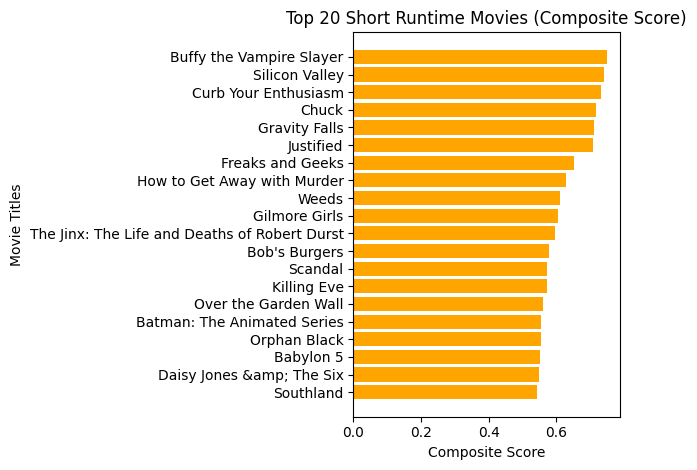

In [579]:
#Top 20 phim ngắn với Composite Score cao nhất

top_20_short_runtime = top_20_short_runtime.sort_values('Composite Score', ascending=True)

plt.barh(top_20_short_runtime['Title'], top_20_short_runtime['Composite Score'], color='orange')
plt.title('Top 20 Short Runtime Movies (Composite Score)')
plt.xlabel('Composite Score')
plt.ylabel('Movie Titles')
plt.tight_layout()
plt.show()


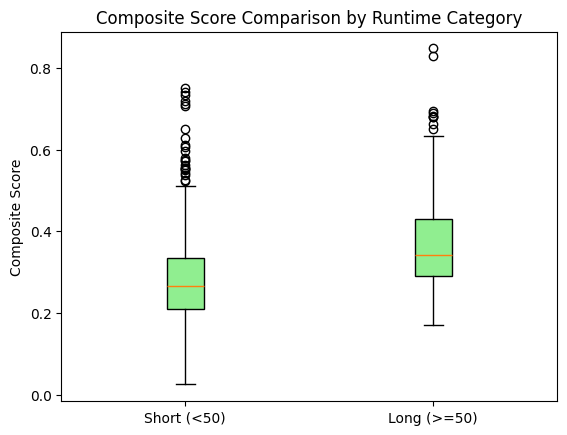

In [580]:
#So sánh thời lượng phim ngắn và dài

df['Runtime Category'] = df['Runtime'].apply(lambda x: 'Short (<50)' if x < 50 else 'Long (>=50)')
plt.boxplot(
    [df[df['Runtime Category'] == 'Short (<50)']['Composite Score'], 
     df[df['Runtime Category'] == 'Long (>=50)']['Composite Score']],
    labels=['Short (<50)', 'Long (>=50)'],
    patch_artist=True,
    boxprops=dict(facecolor='lightgreen')
)
plt.title('Composite Score Comparison by Runtime Category')
plt.ylabel('Composite Score')
plt.show()


Câu 3: Is there a relationship between runtime and rating?
• Benefit: Determines if viewers prefer shorter or longer formats.
• How to Find the Answer: Plot runtime vs. rating using scatter plots with regression lines.

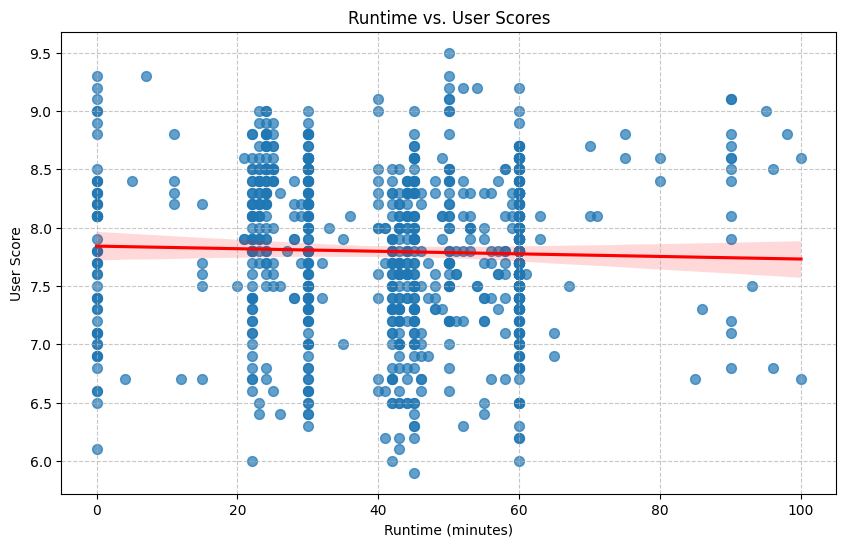

Correlation between Runtime and User Scores: -0.03


In [581]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# # Sample data (replace this with your actual dataset)
# data = pd.DataFrame({
#     'Runtime': [45, 25, 44, 45, 35, 60, 120, 30],
#     'User_Score': [1.2, 1.6, 2.9, 3.6, 4.1, 8.5, 9.3, 6.7]
# })

# Plot scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=data, x='Runtime', y='Rating', scatter_kws={'s': 50, 'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('Runtime vs. User Scores')
plt.xlabel('Runtime (minutes)')
plt.ylabel('User Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Calculate correlation between Runtime and User Scores
correlation = data['Runtime'].corr(data['Rating'])
print(f"Correlation between Runtime and User Scores: {correlation:.2f}")


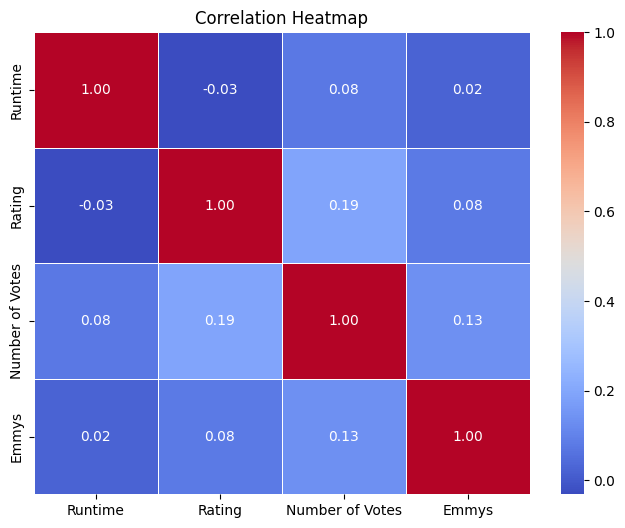

In [582]:
# mối quan hệ giữa rating và các cột còn lại
# Tính hệ số tương quan giữa Rating và các cột còn lại
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matrix_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


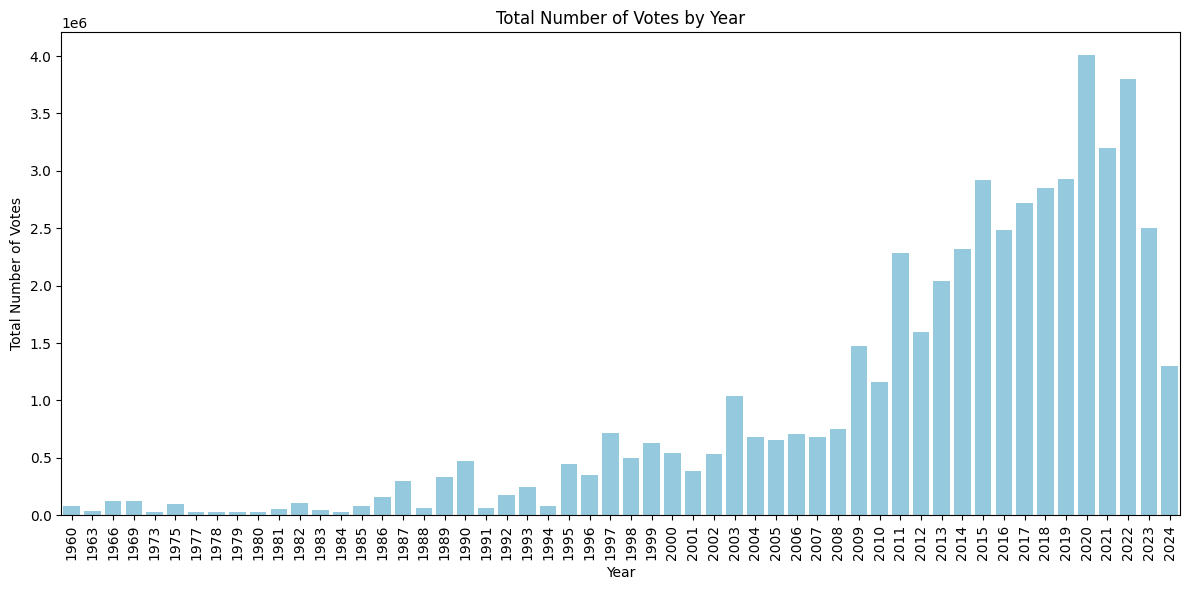

In [583]:
# Biểu đồ giữa Number of Votes và Year dùng barchart

import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Year' và tính tổng số phiếu bầu 'Number of Votes' cho mỗi năm
votes_by_year = data.groupby('Year')['Number of Votes'].sum().reset_index()

# Vẽ bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=votes_by_year, x='Year', y='Number of Votes', color='skyblue')

# Thêm tiêu đề và nhãn cho các trục
plt.title('Total Number of Votes by Year')
plt.xlabel('Year')
plt.ylabel('Total Number of Votes')
# Xoay nhãn trục x 90 độ
plt.xticks(rotation=90)
# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


Những năm gần đây số lượt vote rất cao chúng tỏ ngành công nghiệp phim rất phát triển. (Lấy 1 vài năm để ví dụ). Tuy nhiên lúc cào dữ liệu trên trang web thì năm 2024 chưa hết nên số lượng có ít hơn.

Huấn luyện model

In [584]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Giả sử data đã được chuẩn bị và có cột 'Runtime', 'Number of Votes', 'Emmys', 'Rating'

# Chọn các đặc trưng (features) và nhãn (target)
X = data[['Runtime', 'Number of Votes', 'Emmys']]  # Các cột đầu vào
y = data['Rating']  # Cột đầu ra (nhãn)

# Chia tập train-test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Định nghĩa các tập đặc trưng
features_list = [
    ['Runtime'],                         # 1 cột
    ['Runtime', 'Number of Votes'],      # 2 cột
    ['Runtime', 'Number of Votes', 'Emmys']  # 3 cột
]

# Lưu kết quả
results = []

# Lặp qua từng bộ đặc trưng
for features in features_list:
    # Tách tập huấn luyện và kiểm tra
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]

    # Khởi tạo và huấn luyện mô hình
    model = LinearRegression()
    model.fit(X_train_subset, y_train)

    # Dự đoán trên tập kiểm tra
    y_pred = model.predict(X_test_subset)


    coefficients = pd.DataFrame({
        'Feature': X_train_subset.columns,  # Các tên cột đặc trưng
        'Coefficient': model.coef_ # Trọng số của từng đặc trưng
    })

    # Đánh giá mô hình
    # mse = mean_squared_error(y_test, y_pred)
    # mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Lưu kết quả
    results.append({
        'Features': features,
        'R²': r2,
        'Coefficients': coefficients['Coefficient'].to_list()  # Chuyển trọng số thành danh sách
    })

# Hiển thị kết quả
results_df = pd.DataFrame(results)
print("Hiệu năng của các mô hình dựa trên số lượng đặc trưng:")
results_df


Hiệu năng của các mô hình dựa trên số lượng đặc trưng:


,Features,R²,Coefficients
0,[Runtime],-0.001275,[-0.000564429329415552]
1,"[Runtime, Number of Votes]",0.020447,"[-0.0009612688532403246, 3.985069730353694e-06]"
2,"[Runtime, Number of Votes, Emmys]",0.024745,"[-0.0010433449312279518, 3.823629167116479e-06..."


In [585]:
# Tìm mô hình có R² cao nhất
best_model = results_df.loc[results_df['R²'].idxmax()]

# Lấy danh sách trọng số của mô hình tốt nhất
best_coefficients = best_model['Coefficients']

# In kết quả
print("Trọng số của mô hình có R² cao nhất:")
print(best_coefficients)


data['Weighted Composite Score'] = (
    X['Runtime'] * coefficients['Coefficient'][0] +
    X['Number of Votes'] * coefficients['Coefficient'][1] +
    X['Emmys'] * coefficients['Coefficient'][2]
)

# Hiển thị kết quả
print(data[['Title', 'Weighted Composite Score']])

Trọng số của mô hình có R² cao nhất:
[-0.0010433449312279518, 3.823629167116479e-06, 0.0637903241720009]
                  Title  Weighted Composite Score
29      Secret Invasion                  0.262763
30               Cursed                  0.067403
31                 Joey                  0.149110
32                 Echo                  0.112948
33      Black Lightning                  0.062198
...                 ...                       ...
1124         The Chosen                  0.138664
1127     Blue Planet II                  0.195157
1129  Sapne Vs Everyone                  0.271478
1130              Bluey                  0.118876
1136    Planet Earth II                  0.694841

[855 rows x 2 columns]


In [586]:
# Show lại kết quả các chương trình hay nhất

res = data.sort_values(by='Weighted Composite Score', ascending=False)[['Title', 'Weighted Composite Score']]
print(res.nlargest(n=10, columns='Weighted Composite Score')[['Title', 'Weighted Composite Score']])


print(top_shows)


print(res.loc[top_shows.index])

                            Title  Weighted Composite Score
933                Silicon Valley                  0.746297
815      Buffy the Vampire Slayer                  0.704925
1136              Planet Earth II                  0.694841
1068         Curb Your Enthusiasm                  0.677472
673   How to Get Away with Murder                  0.670680
1084                Gravity Falls                  0.661834
734                         Chuck                  0.652438
821                    The Heroes                  0.646193
871                         Andor                  0.638872
447                   The Sandman                  0.637479
                         Title  Composite Score
1136           Planet Earth II         0.847403
1062          When They See Us         0.828824
815   Buffy the Vampire Slayer         0.750693
933             Silicon Valley         0.740945
1068      Curb Your Enthusiasm         0.732558
734                      Chuck         0.718521
1084

Có sự chênh lệch giữa chúng ta ước lượng và 